**부산**

1. 부산 기온 데이터 수집

2. 부산에서 가장 더웠던 날은? 검색

3. 매년 크리스마스의 최고 기온과 최저 기온 추이 : plot

4. 월별 기온 데이터 : boxplot

In [8]:
#한글 안될 때 선행해둘 것
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,423 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

##1. 부산 기온 데이터 수집

In [6]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('/content/drive/MyDrive/Dev_work/DS/data/busan_utf8.csv',header=7)

#데이터 전처리(컬럼명 수정)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)

In [7]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1904-04-09,159,11.3,7.8,16.1
1,1904-04-10,159,9.3,4.7,15.2
3,1904-04-12,159,11.3,8.8,13.4
4,1904-04-13,159,14.5,11.1,16.9
5,1904-04-14,159,9.4,8.6,16.0


##2. 부산에서 가장 더웠던 날은? 검색

In [15]:
# 날짜 데이터 Str => date 형으로 변환
df['날짜']=df['날짜'].astype('datetime64')
df.info()

df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43253 entries, 0 to 43263
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      43253 non-null  datetime64[ns]
 1   지점      43253 non-null  int64         
 2   평균기온    43253 non-null  float64       
 3   최저기온    43253 non-null  float64       
 4   최고기온    43253 non-null  float64       
 5   년       43253 non-null  int64         
 6   월       43253 non-null  int64         
 7   일       43253 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 4.0 MB


In [12]:
df.sort_values(by=['최고기온'],ascending=False)

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
41035,2016-08-14,159,31.7,28.3,37.3,2016,8,14
28971,1983-08-04,159,30.8,26.5,36.7,1983,8,4
41036,2016-08-15,159,29.4,25.3,36.6,2016,8,15
41756,2018-08-05,159,31.3,28.1,36.4,2018,8,5
41392,2017-08-06,159,31.7,27.6,36.2,2017,8,6
...,...,...,...,...,...,...,...,...
26560,1976-12-27,159,-8.4,-11.5,-5.3,1976,12,27
28082,1981-02-26,159,-7.9,-10.4,-5.7,1981,2,26
3932,1915-01-14,159,-8.9,-12.7,-5.8,1915,1,14
10519,1933-01-26,159,-8.5,-9.7,-6.2,1933,1,26


In [13]:
# 부산에서 가장 더웠던 날은? 2016-08-14: 37.3도 출력

max_year=df.loc[41035,'년']
max_month=df.loc[41035,'월']
max_day=df.loc[41035,'일']
max_temp=df.loc[41035,'최고기온']

print(f'부산에서 가장 더웠던 날은 {max_year}년 {max_month}월 {max_day}일의 {max_temp}도 입니다')


부산에서 가장 더웠던 날은 2016년 8월 14일의 37.3도 입니다


##3. 매년 크리스마스의 최고 기온과 최저 기온 추이 : plot

Text(0, 0.5, 'average temperature (℃)')

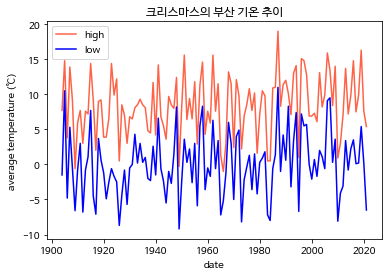

In [14]:
# 한글사용시 설정
plt.rc('font', family='NanumBarunGothic') # 윈도우, 코랩
plt.rcParams['axes.unicode_minus']=False  #마이너스 기호 깨짐 방지

xmas_df= df[(df['월'] == 12) & (df['일'] ==25)]
plt.plot(xmas_df['년'],xmas_df['최고기온'], color='tomato',label='high')
plt.plot(xmas_df['년'],xmas_df['최저기온'], color='b',label='low')
plt.title('크리스마스의 부산 기온 추이')
plt.legend()
plt.xlabel('date')
plt.ylabel('average temperature (℃)')

##4. 월별 기온 데이터 : boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


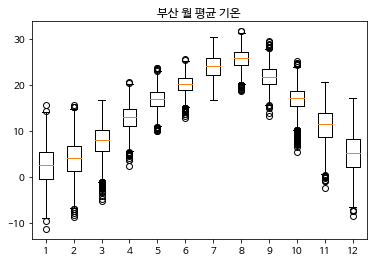

총 부산 온도 관측치 평균 온도는 14.17도 입니다
총 부산 온도 관측치 평균 온도의 최고온도는 31.7도 입니다
총 부산 온도 관측치 평균 온도의 최저온도는 -11.3도 입니다


In [43]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False

avg_month = []
max_month = []
min_month = []

plt.title('부산 월 평균 기온')

for i in range(1, 13):
    avg_month.append(df.loc[df['월']==i, '평균기온'])
    max_month.append(df.loc[df['월']==i, '최고기온'])
    min_month.append(df.loc[df['월']==i, '최저기온'])

plt.boxplot(avg_month)
plt.show()

avg_temp = round(df['평균기온'].mean(),2)
print(f'총 부산 온도 관측치 평균 온도는 {avg_temp}도 입니다')
avg_max_temp = round(df['평균기온'].max(),2)
print(f'총 부산 온도 관측치 평균 온도의 최고온도는 {avg_max_temp}도 입니다')
avg_min_temp = round(df['평균기온'].min(),2)
print(f'총 부산 온도 관측치 평균 온도의 최저온도는 {avg_min_temp}도 입니다')

In [25]:
df['평균기온'].mean()

14.168453055279402

In [28]:
type(df['평균기온'].mean())

numpy.float64

In [30]:
round(df['평균기온'].mean(),2)

14.17

In [32]:
avg_temp = round(df['평균기온'].mean(),2)
print(f'총 관측치 평균은 {avg_temp}도 입니다')

총 관측치 평균은 14.17도 입니다


In [35]:
max_temp = round(df['최고기온'].mean(),2)
print(f'총 관측치 최고온도의 평균은 {max_temp}도 입니다')

총 관측치 최고온도는 18.44도 입니다


In [36]:
min_temp = round(df['최저기온'].mean(),2)
print(f'부산 최저온도의 평균은 {min_temp}도 입니다')

총 관측치 평균은 10.82도 입니다


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


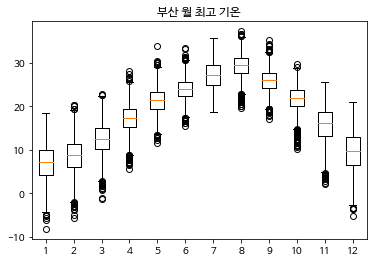

총 관측치 최고온도의 평균은 18.44도 입니다
총 관측치 최고온도의 최대값은 37.3도 입니다


In [44]:
plt.title('부산 월 최고 기온')

plt.boxplot(max_month)
plt.show()

max_avg_temp = round(df['최고기온'].mean(),2)
print(f'총 관측치 최고온도의 평균은 {max_avg_temp}도 입니다')
max_temp = round(df['최고기온'].max(),2)
print(f'총 관측치 최고온도의 최대값은 {max_temp}도 입니다')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


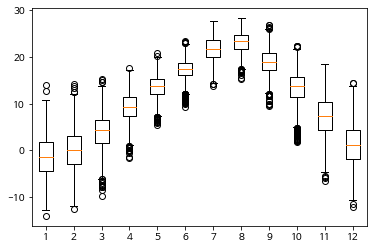

총 관측치 최저온도의 평균은 10.82도 입니다
총 관측치 최저온도의 최소값은 -14.0도 입니다


In [45]:
plt.boxplot(min_month)
plt.show()
min_avg_temp = round(df['최저기온'].mean(),2)
print(f'총 관측치 최저온도의 평균은 {min_avg_temp}도 입니다')
min_temp = round(df['최저기온'].min(),2)
print(f'총 관측치 최저온도의 최소값은 {min_temp}도 입니다')